In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1 - Importação das bibliotecas

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export, export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


# 2 - Importação da base de dados

In [3]:
PATH = '/content/drive/MyDrive/Colab Notebooks/Machine Learning e Data Science com Python de A a Z/Estudo geral/risco_credito.csv'
base = pd.read_csv(PATH)
base.head()

,historia,divida,garantias,renda,c#risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


# 3 - Iniciando os estudos e modificações

## 3.1 - Separando a base

In [4]:
previsores = base.iloc[:, 0:4].values
previsores

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [5]:
classe = base.iloc[:, 4].values
classe

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

## 3.2 - Tratando as chaves para categóricos

In [6]:
label_encoder = LabelEncoder()

In [7]:
for i in range(previsores.shape[1]):
  previsores[:, i] = label_encoder.fit_transform(previsores[:, i])

In [8]:
previsores

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

# 4 - Gerando o classificador e a predição.

## 4.1 - Utilizando o classificador Gaussiano Nive Bayes.

### 4.1.1 - Criando a predição

In [9]:
classificador = GaussianNB()

In [10]:
classificador.fit(previsores, classe)

GaussianNB(priors=None, var_smoothing=1e-09)

### 4.1.2 - Resultados- NB

In [11]:
resultado = classificador.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
resultado

array(['baixo', 'moderado'], dtype='<U8')

In [12]:
print(classificador.classes_)

['alto' 'baixo' 'moderado']


In [13]:
print(classificador.class_count_)

[6. 5. 3.]


In [14]:
print(classificador.class_prior_)

[0.42857143 0.35714286 0.21428571]


## 4.2 - Utilizando Árvore de Decisão.

### 4.2.1 - Criando a predição

In [15]:
classificador_DT = DecisionTreeClassifier(criterion = 'entropy')

In [16]:
classificador_DT.fit(previsores, classe)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 4.2.2 - Resultados - DT

In [17]:
print(classificador_DT.feature_importances_)

[0.41607015 0.10294068 0.03885431 0.44213486]


In [18]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [19]:
tree_graph_to_png(tree=classificador_DT, feature_names=['historia', 'divida', 'garantias', 'rendas'],
                  png_file_to_save='arvore_decisao.png')

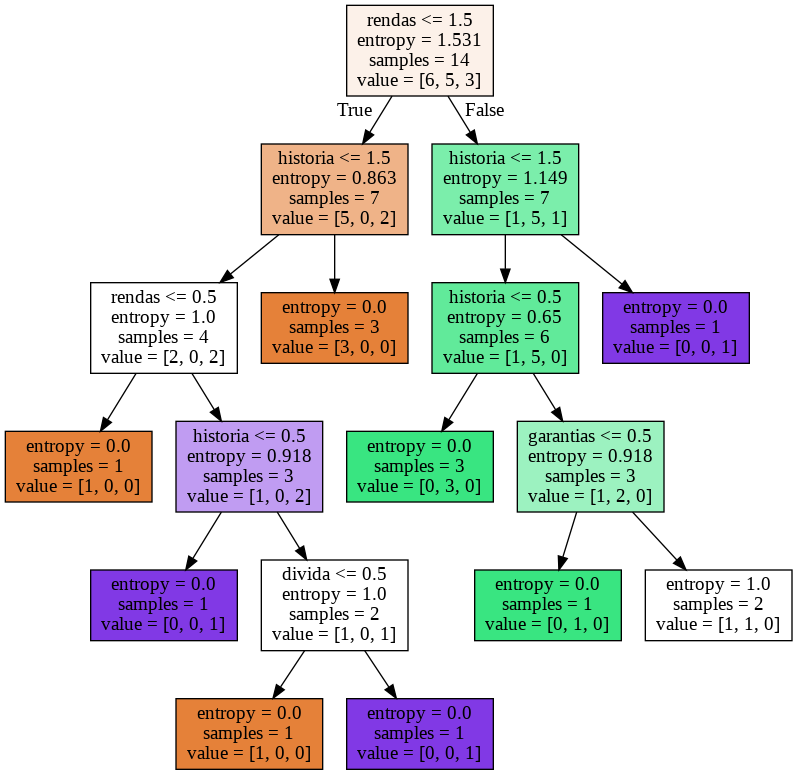

In [20]:
resultado = classificador_DT.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
resultado

array(['baixo', 'alto'], dtype=object)